Link to canva preview: <a href = "https://www.canva.com/design/DAF2wXA9iB0/oGka92fWnQ4tCS0wxEigKw/view?utm_content=DAF2wXA9iB0&utm_campaign=designshare&utm_medium=link&utm_source=editor&fbclid=IwAR14tZHm10_PEZVZy1KTD2xwkOgCEfx-1bKTSbj1DPIM9viGSAdTUkAL5Wk" > Canva preview </a>

# **SVD** #

## Example calculating SVD ##

**Example**: Find the SVD of $A$, $U \Sigma V^T$, where $A = \begin{pmatrix}3 & 2 & 2 \\ 2 & 3 & -2\end{pmatrix}$.

The characteristic polynomial is *$det(A.A^T - \lambda.I) = \lambda^2 - 34\lambda +225 $*

Solving above polynomial, we have $\lambda_1 = 25$ and $\lambda_2 = 9$ ➡ $\sigma_1 = 5$ and $\sigma_2 = 3$.

Now we find the right singular vectors (the columns of V )

By finding an orthonormal
set of eigenvectors of $A^TA$. It is also possible to proceed by finding the left singular
vectors (columns of U) instead. The eigenvalues of $A^TA$ are 25, 9, and 0, and since
ATA is symmetric we know that the eigenvectors will be orthogonal.

For $\lambda=25$, we have $v_1 =
\begin{pmatrix}
1/\sqrt{2} \\
1/\sqrt{2} \\
0
\end{pmatrix}
$


For $\lambda=9$, we have $v_2 =
\begin{pmatrix}
1/\sqrt{18} \\
-1/\sqrt{18} \\
4/\sqrt{18}
\end{pmatrix}
$

For $\lambda = 0$, we have $v_3 =
\begin{pmatrix}
    2/3 \\
    -2/3 \\
    -1/3
\end{pmatrix}
$

So, we have:
\begin{align}
 A &= U \Sigma V^T \\
   &= U \begin{pmatrix} 5&0&0 \\ 0&3&0 \end{pmatrix}
   \begin{pmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\
                   \frac{1}{\sqrt{18}} & \frac{-1}{\sqrt{18}} & \frac{4}{\sqrt{18}} \\ \frac{2}{3} & \frac{-2}{3} & \frac{-1}{3}
    \end{pmatrix}
\end{align}




Finally we can compute $U$ by the formula *$u_i = \frac{1}{\sigma_i} A v_i$* . So $U =
\begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{pmatrix}
$


So, the SVD is:

$A = \begin{pmatrix}3 & 2 & 2 \\ 2 & 3 & -2\end{pmatrix} = \begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}}
\end{pmatrix}
\begin{pmatrix} 5&0&0 \\ 0&3&0 \end{pmatrix}
   \begin{pmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\
                   \frac{1}{\sqrt{18}} & \frac{-1}{\sqrt{18}} & \frac{4}{\sqrt{18}} \\ \frac{2}{3} & \frac{-2}{3} & \frac{-1}{3}
    \end{pmatrix}
$

## SVD in Python ##

In [ ]:
#import libs
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [9, 4]

In [ ]:
#Define svd function
def mySVD(A):
    m, n= A.shape

    #calculate eigen values and right singular vectors
    eigenvalues, V = np.linalg.eig(A.T @ A)
    eigenvalues = np.round(eigenvalues, decimals = 4)

    #sort the eigen values and right singular vectors descending
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = (eigenvalues[idx])
    V = V[:,idx]
    VT = V.T

    #calc the singular values by square root eigen values
    singularvalues = np.sqrt(eigenvalues)

    #calc left singular vectors
    U = (A @ V)[:, 0:m] / singularvalues[0:m]
    U = U[:, :m]

    S = np.diag(singularvalues)[0:m, :] #truncate the 0 values

    return U, S, VT



In [ ]:
#generate data
A = [[3,2,2],[2,3,-2]]
A = np.array(A)
print(A)



[[ 3  2  2]
 [ 2  3 -2]]


In [ ]:
# SVD without lib
U, S, VT = mySVD(A)
print('U = \n', U)
print('S = \n', S)
print('VT = \n', VT)

#SVD with lib
U_lib, S_lib, VT_lib = np.linalg.svd(A, full_matrices=False)
print('U_lib = \n', U_lib)
print('S_lib = \n', np.diag(S_lib))
print('VT_lib = \n', VT_lib)


U = 
 [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
S = 
 [[5. 0. 0.]
 [0. 3. 0.]]
VT = 
 [[-7.07106781e-01 -7.07106781e-01 -4.55680392e-17]
 [ 2.35702260e-01 -2.35702260e-01  9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]
U_lib = 
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
S_lib = 
 [[5. 0.]
 [0. 3.]]
VT_lib = 
 [[-7.07106781e-01 -7.07106781e-01 -6.47932334e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]]


In [ ]:

#reconstruct the origin matrix
print("Origin matrix: \n", A)
X = U @ S @ VT
print("\n\n--> Without lib: \n", X)
X_lib = U_lib @ np.diag(S_lib) @ VT_lib
print("\n\n--> Using lib: \n", X_lib)

Origin matrix: 
 [[ 3  2  2]
 [ 2  3 -2]]


--> Without lib: 
 [[ 3.  2.  2.]
 [ 2.  3. -2.]]


--> Using lib: 
 [[ 3.  2.  2.]
 [ 2.  3. -2.]]


## Example of SVD in Image Compression ##

In [ ]:
#command to download image from provided link
!wget -q -O cat.jpg 'https://www.safehavenforcats.org/wp-content/uploads/2023/05/SH-Ultimate-Cat-Supply-List-1080x640-1-1.jpg'

In [ ]:
#import image
A = imread('cat.jpg')
x = np.mean(A, -1)


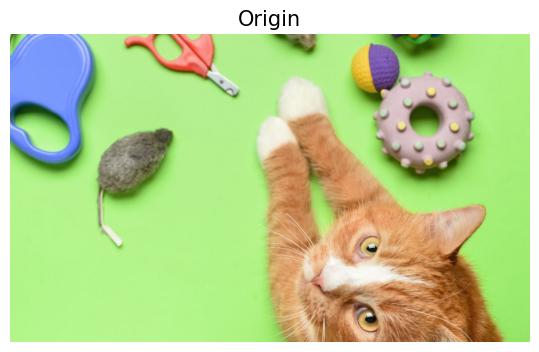

In [ ]:
#show origin image
plt.axis('off')
plt.title('Origin', size = 15)
plt.imshow(A)
plt.show()


(640, 1080)

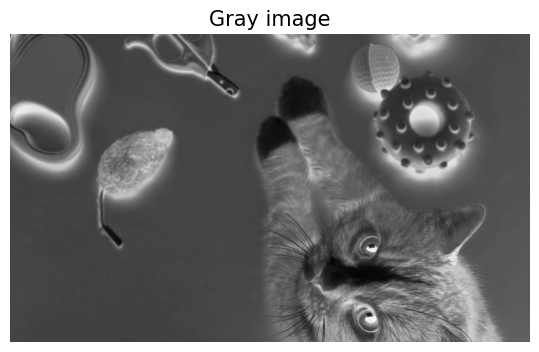

In [ ]:
#convert into gray img
plt.axis('off')
img = plt.imshow(256-x)
img = img.set_cmap('gray')

plt.title('Gray image', size = 15)
x.shape



In [ ]:
#Process SVD
U, S, VT = np.linalg.svd(x, full_matrices=False)
S = np.diag(S)

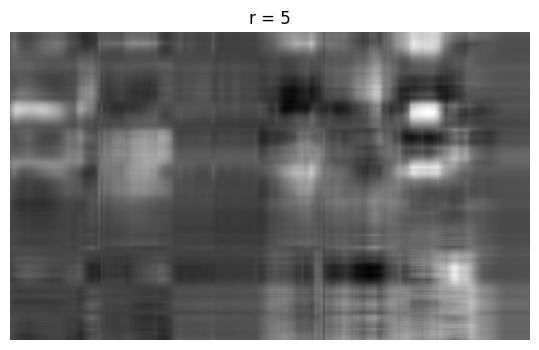

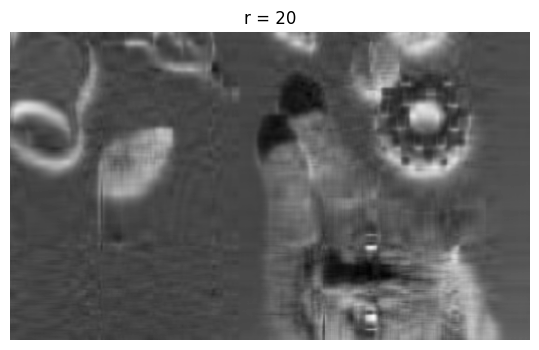

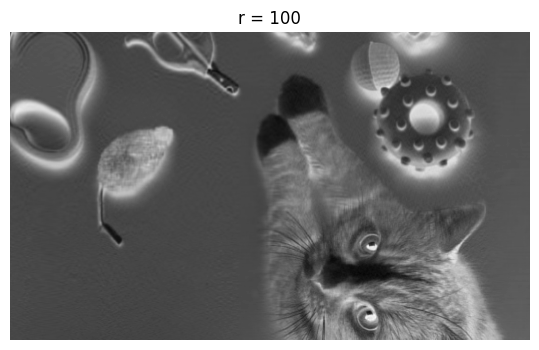

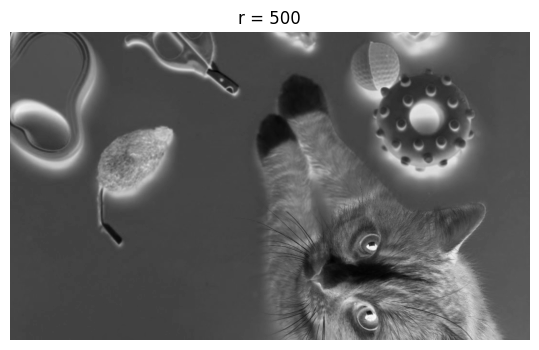

In [ ]:
#Reconstruct the origin image
j = 0
for r in (5, 20, 100, 500):
    #construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(256 - Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()




With $r$ = 20, we can regconise objects in the image. With $r$ = 100 or $r$ = 500 we can clearly see all objects in the image, like the origin image.

Now plot the singular values with log function: $\log(\sigma_j)$.

Secondly, we plot the cumulative energy in the first $r$ modes:
\begin{align}
    \frac{\sum_{i=1}^r \sigma_i}{\sum_{j=1}^m \sigma_j}
    \end{align}

This will tell how much energy captured by considering the first $r$ modes.The more energy captured, the more variance of data we can capture.





(640, 640)


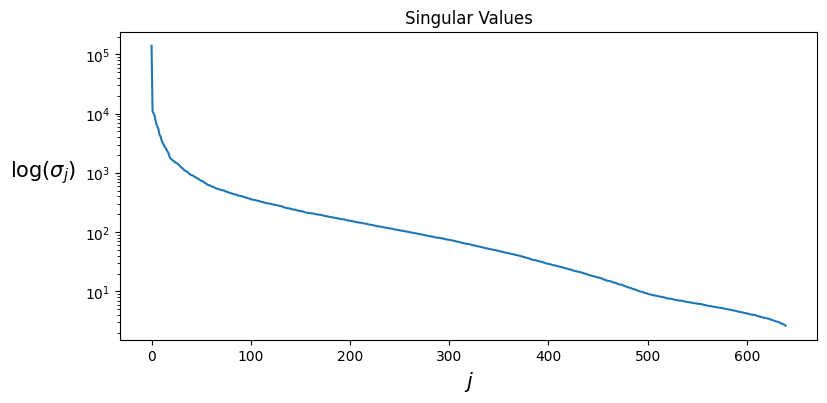

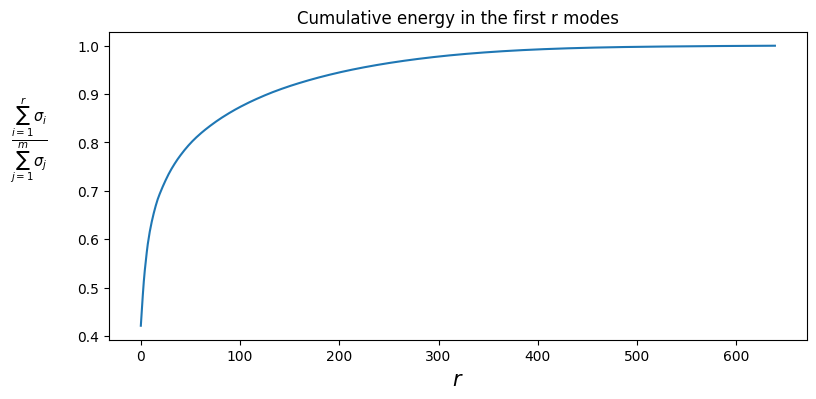

Energy captured ratio at r = 5: 0.55545
Energy captured ratio at r = 50: 0.79838
Energy captured ratio at r = 100: 0.87345
Energy captured ratio at r = 200: 0.94479
Energy captured ratio at r = 500: 0.99770


In [ ]:
plt.figure(1)
print(S.shape)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.xlabel('$j$', fontsize=15)
plt.ylabel('$\log(\sigma_j)$', fontsize=15, rotation=0, labelpad=30)

plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S)) / np.sum(np.diag(S)))
plt.title('Cumulative energy in the first r modes')
plt.xlabel('$r$', fontsize=15)
ylabel = r'$\frac{\sum_{i=1}^r \sigma_i}{\sum_{j=1}^m \sigma_j}$'
plt.ylabel(ylabel,fontsize=15,rotation=0, labelpad=35)
plt.show()

rate = np.cumsum(np.diag(S)) / np.sum(np.diag(S))

for i in (5, 50, 100, 200, 500):
    print(f'Energy captured ratio at r = {i:}: {rate[i]:.5f}')





## Best low rank $k$ approximation


<!-- If we want to capture at least $p$% data of the origin matrix, we can apply *Best k rank approximation*. -->

We know that $$||A||_F^2 = \sum_{j=1}^r \sigma_j^2$$
Therefore: $$||A_k||_F^2 = \sum_{i=1}^k \sigma_i^2$$
With $k$ is the number of rank 1 matrix: $\sigma_j u_j v_j^T$

First, we compute $\sum_{j=1}^r \sigma_j^2$, then we choose the smallest $k$ subject to:
\begin{align}
    \frac{\sum_{i=1}^k \sigma_i^2}{\sum_{j=1}^r \sigma_j^2} \ge p
\end{align}


Compression ratio:
\begin{align}
\frac{4k(m+n+1)}{mn}
\end{align}

52
Compression ratio:  0.5178935185185185


Text(0.5, 1.0, 'Approximated image with $k$ = 52')

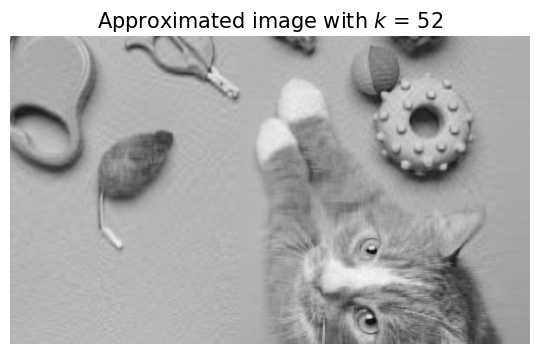

In [ ]:
def approximate(k):
    return U[:,0:k] @ S[0:k,0:k] @ VT[0:k, :]

def find_k(rate):
    rsum = np.sum(np.diag(S)**2)
    r = np.diag(S).shape[0]
    for k in range(r):
        kS = np.diag(S)[0:k]
        ksum = np.sum(kS**2)
        # print(f'ksum = {ksum:.2f}, rsum = {rsum:.2f} --> {ksum/rsum:.10f}')
        if ksum/rsum >= rate:
            return k

#let find k to retain 99,9% of the origin image
k = find_k(0.999)
m, n = x.shape
print(k)
print('Compression ratio: ', 4*k*(m + n + 1)/(m*n))
app = approximate(k)
svd_img = app #used to compared below
plt.imshow(app, cmap = 'gray')
plt.axis('off')
plt.title(f'Approximated image with $k$ = {k}', fontsize=15, loc='center')


Text(0, 0.5, 'Data')

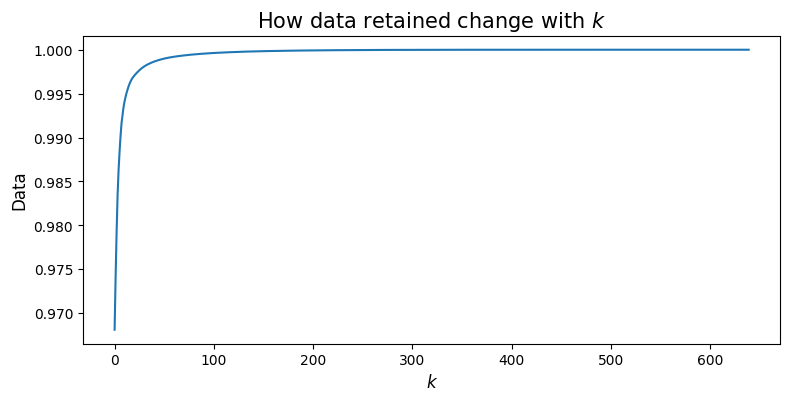

In [ ]:
#Relation between k and amount data retained
s = np.diag(S)
sum = np.sum(s**2)
ksum = np.cumsum(s**2)/sum

plt.plot(ksum)
plt.title('How data retained change with $k$', fontsize=15)
plt.xlabel('$k$', fontsize=12)
plt.ylabel('Data', fontsize=12)




# **PCA**

## SVD Example but in PCA


In [ ]:
#load lib and img
from sklearn.decomposition import PCA
A = imread('cat.jpg')
x = np.mean(A, -1)


In [ ]:
n_components = 52
pca = PCA(n_components, svd_solver = 'randomized', whiten=True)
pca.fit(x)

#U_K
U = pca.components_.T
#mean
mean_vector = pca.mean_


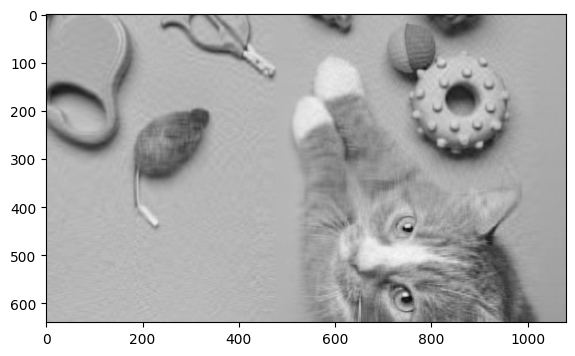

In [ ]:
#approximate
m, n = x.shape
Xbar = np.tile(mean_vector, (m, 1))

#X_hat
Xhat = x - Xbar
# Z
Z = U.T @ Xhat.T
# X approximate
pca_img = (U @ Z + Xbar.T).T
plt.imshow(pca_img, cmap='gray')

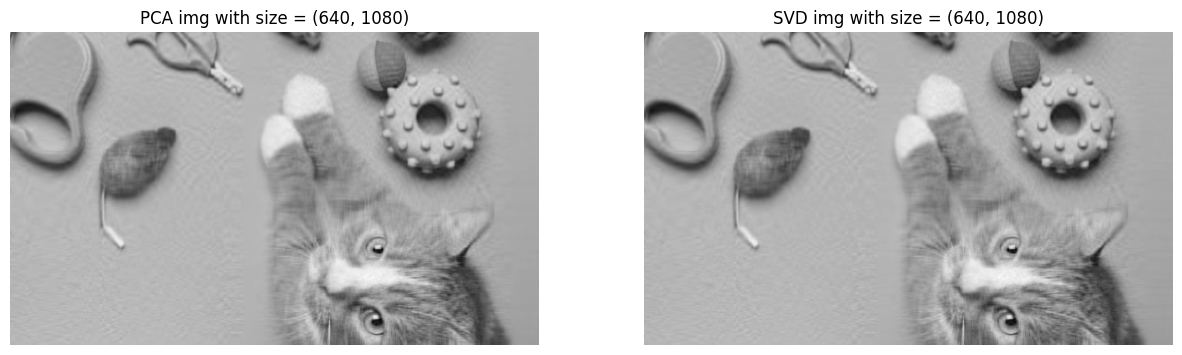

In [ ]:
#show pca and svd images
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))

ax1.imshow(pca_img, cmap='gray')
ax1.set_title('PCA img with size = ' + str(pca_img.shape))
ax1.axis('off')

ax2.imshow(svd_img, cmap='gray')
ax2.set_title('SVD img with size = ' + str(svd_img.shape))
ax2.axis('off')
plt.show()

In [ ]:
#compare results by Frobenius norm
norm_pca = np.linalg.norm(pca_img, 'fro')
norm_svd = np.linalg.norm(svd_img, 'fro')
print('norm_pca = ', norm_pca)
print('norm_svd = ', norm_svd)
print('norm_pca/norm_svd = ', norm_pca/norm_svd)

norm_pca =  142400.49398225773
norm_svd =  142398.90968003875
norm_pca/norm_svd =  1.0000111258030173


## Eigen Faces


In [ ]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

#load images of
img = lfw_people.images
n_samples, h, w = img.shape

#load data presented as vectors (each row is an img, number of cols is number of features)
X = lfw_people.data

# load number of features
n_features = X.shape[1]

# id of each image
y = lfw_people.target

# load number classes
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

#create a list of names
labels = [target_names[i] for i in y]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
#define a function to plot image
def plot_gallery(images, titles=labels, show_labels=False, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if show_labels == 1:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


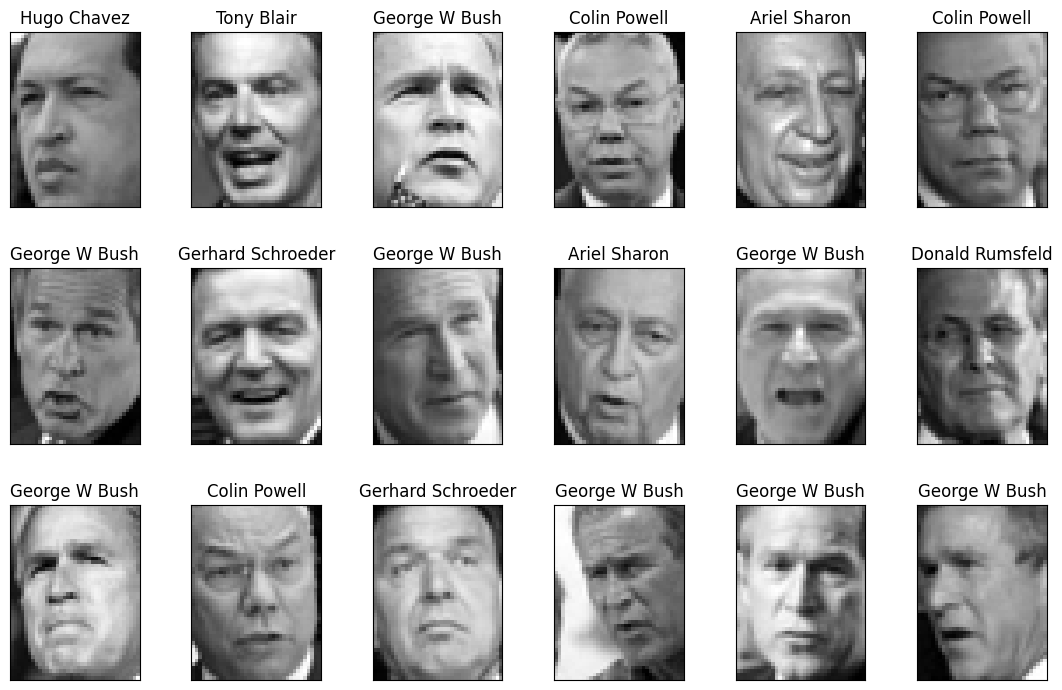

In [ ]:
#plot the first 18 imgs in dataset
plot_gallery(img, labels, True, 3, 6)

In [ ]:
#PCA
from sklearn.decomposition import PCA
n_components = 200
pca = PCA(n_components, svd_solver = 'randomized', whiten = True)
pca.fit(X)

# n_components eigen faces
eigenfaces = pca.components_.reshape((n_components, h, w))

# U_K
U = pca.components_.T

#X_mean
mean_vector = pca.mean_
meanface = mean_vector.reshape(h, w)


In [ ]:
print(eigenfaces.shape)

(200, 50, 37)


Now the dataset including 1288 images is decomposed by an 100 component images set called *eigenfaces* and a mean face.

**--> We can approximate the origin dataset using eigenface.**

Text(0.5, 1.0, 'Mean face')

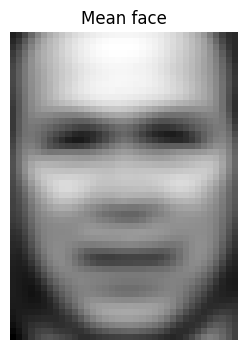

In [ ]:
#plot the mean face
plt.imshow(meanface, cmap='gray')
plt.axis('off')
plt.title('Mean face')


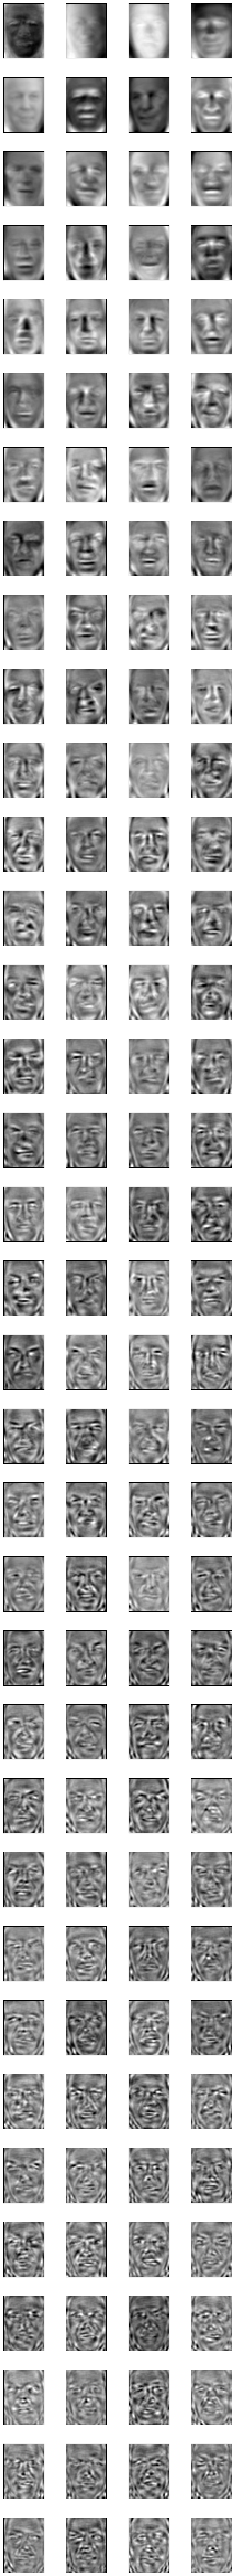

In [ ]:
#plot 150 first eigen faces
plot_gallery(eigenfaces, '', False, 35, 4)

In [ ]:
#Approximate origin dataset
m, n= X.shape
# X_bar
Xmean = np.tile(mean_vector, (m, 1))
#X_hat
Xhat = X - Xmean
# Z
Z = U.T @ Xhat.T

#X approximated
Xappro = (U @ Z + Xmean.T).T
img_appro = Xappro.reshape((n_samples, h, w))

print("Xbar: ", Xmean.shape)
print("Xhat: ", Xhat.shape)
print("X :   ", X.shape)
print("U :   ", U.shape)
print("Z :   ", Z.shape)
print("Xappro: ", Xappro.shape)
# print("img_appro: ", img_appro.shape)



Xbar:  (1288, 1850)
Xhat:  (1288, 1850)
X :    (1288, 1850)
U :    (1850, 200)
Z :    (200, 1288)
Xappro:  (1288, 1850)


Origin


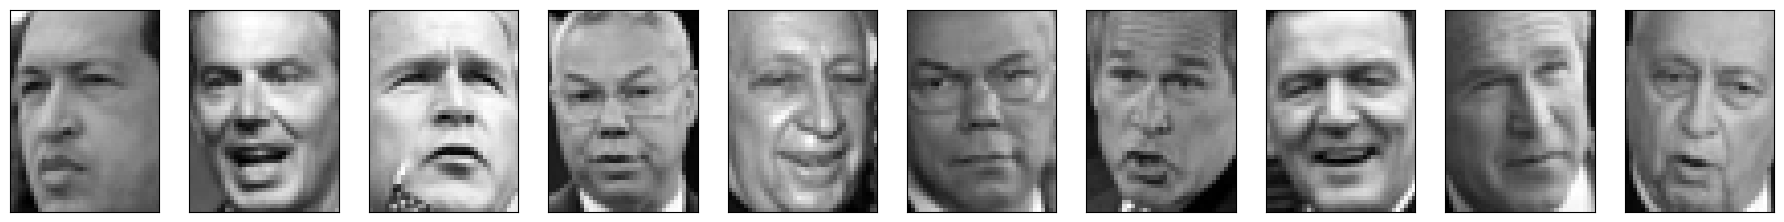

In [ ]:
#compare
nshow = 10
plot_gallery(img, '', 0, 1, nshow)
print('Origin')



Approximated


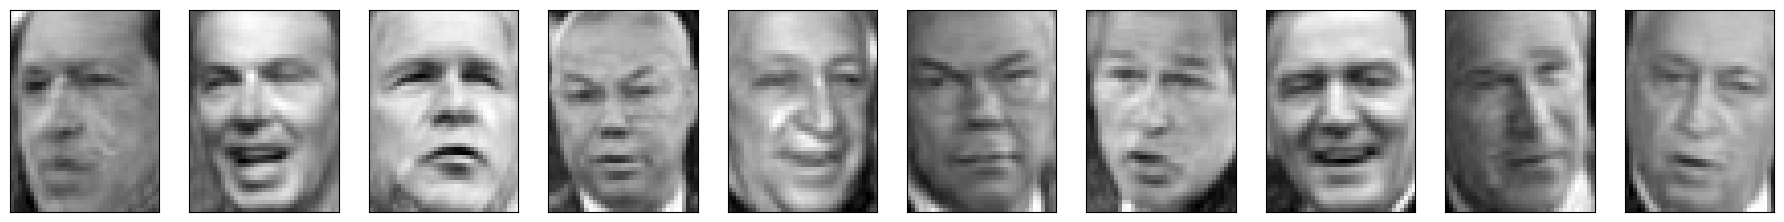

In [ ]:
plot_gallery(img_appro, '', 0, 1, nshow)
print('Approximated')
